In [5]:
import numpy as np
from math import gcd
from functools import reduce
import matplotlib.pyplot as plt
import heapq
import random
from tqdm import tqdm
from itertools import product

In [6]:
def gcd_list(nums):
    return reduce(gcd, nums)


def frobenius_number_nijenhuis(numbers):
    if not numbers:
        return 0
    numbers = sorted(numbers)
    min_num = numbers[0]
    n = min_num
    if min_num == 1:
        return 0
    edges = [[] for _ in range(n)]
    temp_g = [{} for _ in range(n)]
    for i in range(n):
        for num in numbers:
            v = (num + i) % n
            if v not in temp_g[i] or temp_g[i][v] > num:
                temp_g[i][v] = num
    for i in range(n):
        for v, w in temp_g[i].items():
            edges[i].append((v, w))
    INF = float('inf')
    dist = [INF] * n
    dist[0] = 0
    heap = [(0, 0)]
    while heap:
        d_v, v = heapq.heappop(heap)
        if d_v != dist[v]:
            continue
        for u, w in edges[v]:
            if dist[u] > dist[v] + w:
                dist[u] = dist[v] + w
                heapq.heappush(heap, (dist[u], u))
    max_dist = max(dist[1:]) if n > 1 else 0
    return max_dist - n


def simulate_path_graph(edge_lengths: list[int]) -> tuple[int, list[int]]:
    points = []
    stabilization_times = [-1] * len(edge_lengths)
    points.append([0, 1])
    vertex_positions = [0]
    for length in edge_lengths:
        vertex_positions.append(vertex_positions[-1] + length)
    total_length = vertex_positions[-1]
    t = 1

    while True:
        for point in points:
            point[0] += point[1]

        new_points = []
        for point in points:
            if point[0] == 0 or point[0] == total_length:
                point[1] *= -1
            elif point[0] in vertex_positions and sum(p[0] == point[0] for p in points) == 1:
                new_points.append([point[0], -point[1]])

        points.extend(new_points)

        for i in range(len(edge_lengths)):
            count = 0
            left, right = vertex_positions[i], vertex_positions[i + 1]
            for point in points:
                pos, dr = point
                if left < pos < right:
                    count += 1
                elif pos == left and dr == 1:
                    count += 1
                elif pos == right and dr == -1:
                    count += 1
            if count == edge_lengths[i] and stabilization_times[i] == -1:
                stabilization_times[i] = t

        if len(points) == sum(edge_lengths):
            return t, stabilization_times
        t += 1

In [7]:
low, high = 2, 10


Processing Monte Carlo for n_edges=30 with 1000 samples...


Sampling: 100%|██████████| 1000/1000 [01:13<00:00, 13.67it/s]


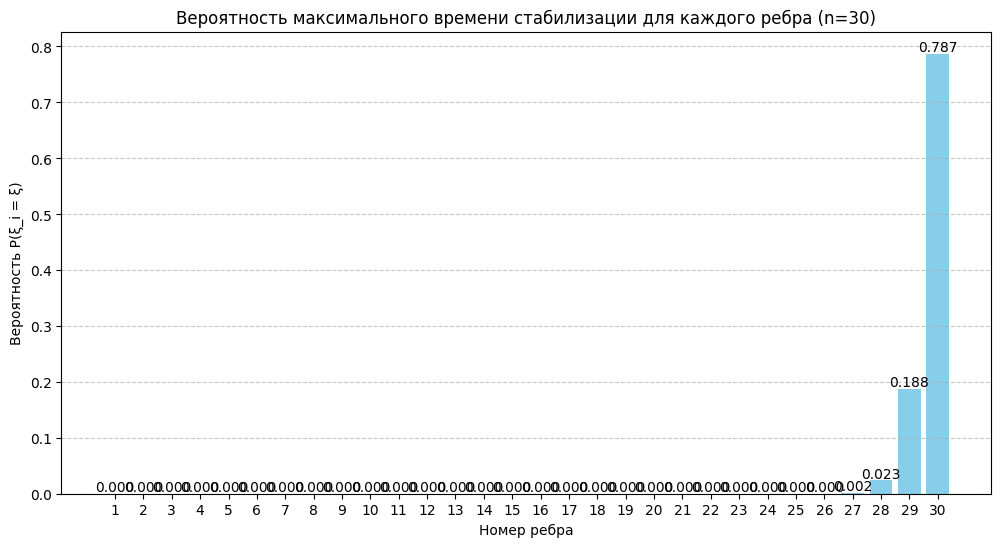


Results for Monte Carlo (n=30, samples=1000):
Edge 1: P = 0.0000
Edge 2: P = 0.0000
Edge 3: P = 0.0000
Edge 4: P = 0.0000
Edge 5: P = 0.0000
Edge 6: P = 0.0000
Edge 7: P = 0.0000
Edge 8: P = 0.0000
Edge 9: P = 0.0000
Edge 10: P = 0.0000
Edge 11: P = 0.0000
Edge 12: P = 0.0000
Edge 13: P = 0.0000
Edge 14: P = 0.0000
Edge 15: P = 0.0000
Edge 16: P = 0.0000
Edge 17: P = 0.0000
Edge 18: P = 0.0000
Edge 19: P = 0.0000
Edge 20: P = 0.0000
Edge 21: P = 0.0000
Edge 22: P = 0.0000
Edge 23: P = 0.0000
Edge 24: P = 0.0000
Edge 25: P = 0.0000
Edge 26: P = 0.0000
Edge 27: P = 0.0015
Edge 28: P = 0.0235
Edge 29: P = 0.1880
Edge 30: P = 0.7870

Processing Monte Carlo for n_edges=40 with 1000 samples...


Sampling: 100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s]


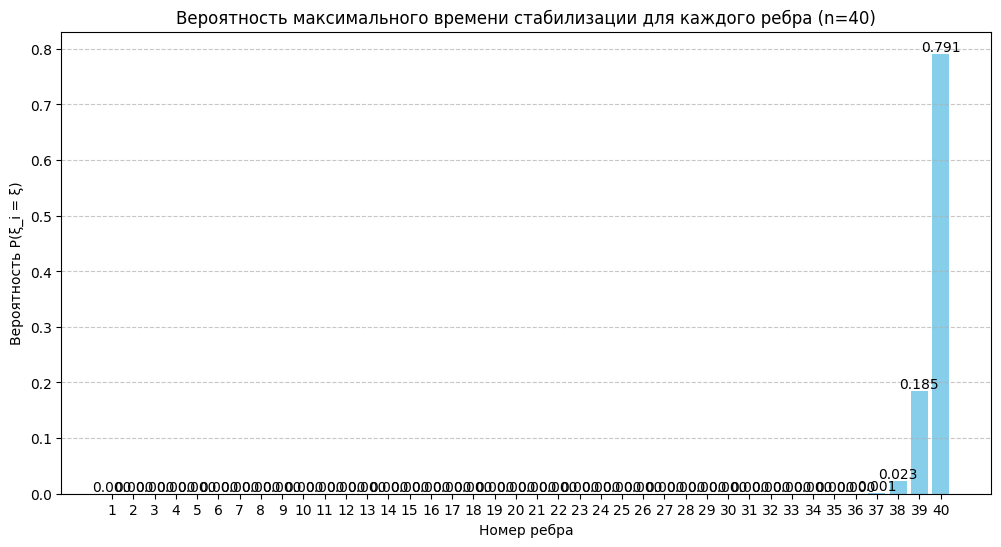


Results for Monte Carlo (n=40, samples=1000):
Edge 1: P = 0.0000
Edge 2: P = 0.0000
Edge 3: P = 0.0000
Edge 4: P = 0.0000
Edge 5: P = 0.0000
Edge 6: P = 0.0000
Edge 7: P = 0.0000
Edge 8: P = 0.0000
Edge 9: P = 0.0000
Edge 10: P = 0.0000
Edge 11: P = 0.0000
Edge 12: P = 0.0000
Edge 13: P = 0.0000
Edge 14: P = 0.0000
Edge 15: P = 0.0000
Edge 16: P = 0.0000
Edge 17: P = 0.0000
Edge 18: P = 0.0000
Edge 19: P = 0.0000
Edge 20: P = 0.0000
Edge 21: P = 0.0000
Edge 22: P = 0.0000
Edge 23: P = 0.0000
Edge 24: P = 0.0000
Edge 25: P = 0.0000
Edge 26: P = 0.0000
Edge 27: P = 0.0000
Edge 28: P = 0.0000
Edge 29: P = 0.0000
Edge 30: P = 0.0000
Edge 31: P = 0.0000
Edge 32: P = 0.0000
Edge 33: P = 0.0000
Edge 34: P = 0.0000
Edge 35: P = 0.0000
Edge 36: P = 0.0000
Edge 37: P = 0.0010
Edge 38: P = 0.0232
Edge 39: P = 0.1847
Edge 40: P = 0.7912

Processing Monte Carlo for n_edges=50 with 1000 samples...


Sampling: 100%|██████████| 1000/1000 [05:20<00:00,  3.12it/s]


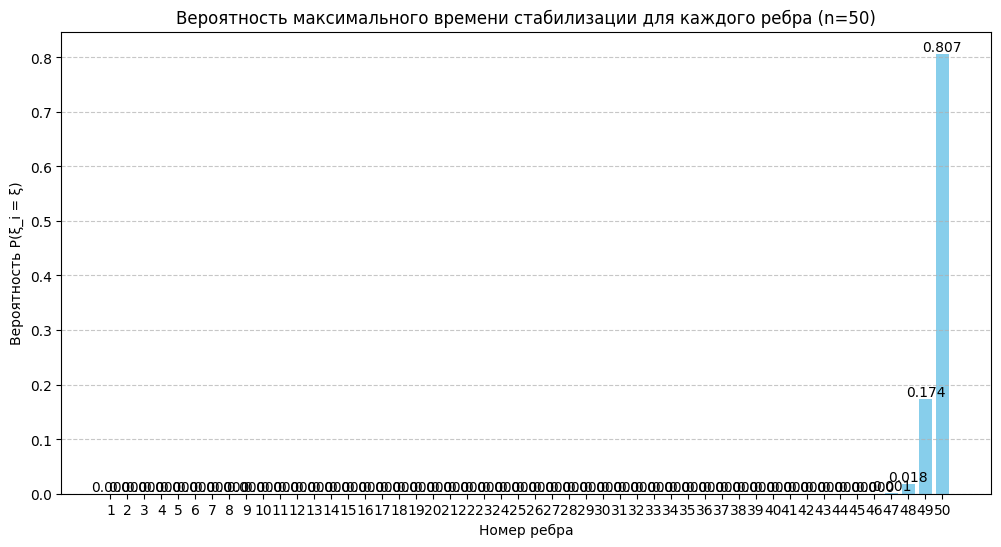


Results for Monte Carlo (n=50, samples=1000):
Edge 1: P = 0.0000
Edge 2: P = 0.0000
Edge 3: P = 0.0000
Edge 4: P = 0.0000
Edge 5: P = 0.0000
Edge 6: P = 0.0000
Edge 7: P = 0.0000
Edge 8: P = 0.0000
Edge 9: P = 0.0000
Edge 10: P = 0.0000
Edge 11: P = 0.0000
Edge 12: P = 0.0000
Edge 13: P = 0.0000
Edge 14: P = 0.0000
Edge 15: P = 0.0000
Edge 16: P = 0.0000
Edge 17: P = 0.0000
Edge 18: P = 0.0000
Edge 19: P = 0.0000
Edge 20: P = 0.0000
Edge 21: P = 0.0000
Edge 22: P = 0.0000
Edge 23: P = 0.0000
Edge 24: P = 0.0000
Edge 25: P = 0.0000
Edge 26: P = 0.0000
Edge 27: P = 0.0000
Edge 28: P = 0.0000
Edge 29: P = 0.0000
Edge 30: P = 0.0000
Edge 31: P = 0.0000
Edge 32: P = 0.0000
Edge 33: P = 0.0000
Edge 34: P = 0.0000
Edge 35: P = 0.0000
Edge 36: P = 0.0000
Edge 37: P = 0.0000
Edge 38: P = 0.0000
Edge 39: P = 0.0000
Edge 40: P = 0.0000
Edge 41: P = 0.0000
Edge 42: P = 0.0000
Edge 43: P = 0.0000
Edge 44: P = 0.0000
Edge 45: P = 0.0000
Edge 46: P = 0.0000
Edge 47: P = 0.0010
Edge 48: P = 0.0183
Ed

In [8]:
for n_edges in [30, 40, 50]:
    num_samples = 1000

    edge_counts = [0.0] * n_edges

    print(f"\nProcessing Monte Carlo for n_edges={n_edges} with {num_samples} samples...")
    pbar = tqdm(total=num_samples, desc="Sampling")

    samples_processed = 0
    while samples_processed < num_samples:
        lengths = [random.randint(low, high) for _ in range(n_edges)]
        if gcd_list(lengths) != 1:
            continue

        try:
            total_time, stab_times = simulate_path_graph(lengths)
            max_time = max(stab_times)

            max_edges = [i for i, time in enumerate(stab_times) if time == max_time]
            k = len(max_edges)

            for i in max_edges:
                edge_counts[i] += 1.0 / k
        except Exception as e:
            print(f"Error for {lengths}: {e}")
            continue

        samples_processed += 1
        pbar.update(1)
    pbar.close()

    edge_probs = [count / num_samples for count in edge_counts]

    plt.figure(figsize=(12, 6))
    edges = list(range(1, n_edges + 1))
    plt.bar(edges, edge_probs, color='skyblue')
    plt.xlabel('Номер ребра')
    plt.ylabel('Вероятность P(ξ_i = ξ)')
    plt.title(f'Вероятность максимального времени стабилизации для каждого ребра (n={n_edges})')
    plt.xticks(edges)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    for i, prob in enumerate(edge_probs):
        plt.text(i + 1, prob + 0.005, f'{prob:.3f}', ha='center')

    plt.savefig(f"monte_carlo_n{n_edges}.png")
    plt.show()

    print(f"\nResults for Monte Carlo (n={n_edges}, samples={num_samples}):")
    for i, prob in enumerate(edge_probs):
        print(f"Edge {i + 1}: P = {prob:.4f}")